# Multiple Regression- IMDb Dataset
## by Tanishq Kaushik

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## Observing the Relationship between Ratings and Metascore  

In [4]:
# Creating a data frame using the csv file
df = pd.read_csv('IMDB_top_10000.csv')
df.head()

,Title,Year,Genres,Runtime,Rating,Metascore,Votes,Gross,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994.0,"['Crime', 'Drama']",142.0,9.3,80.0,1695366.0,28340000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,The Dark Knight,2008.0,"['Action', 'Crime', 'Drama']",152.0,9.0,82.0,1682554.0,533320000.0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Inception,2010.0,"['Action', 'Adventure', 'Sci-Fi']",148.0,8.8,74.0,1473753.0,292570000.0,True,True,...,False,False,False,False,False,True,False,False,False,False
3,Fight Club,1999.0,['Drama'],139.0,8.8,66.0,1352395.0,37020000.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Pulp Fiction,1994.0,"['Crime', 'Drama']",154.0,8.9,94.0,1329035.0,107930000.0,False,False,...,False,False,False,False,False,False,False,False,False,False


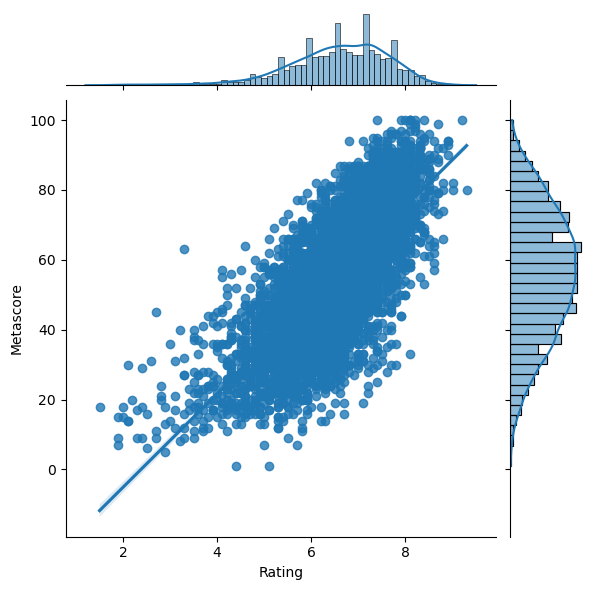

In [5]:
# Creating a scatterplot
sns.jointplot(x='Rating', y='Metascore', data=df, kind="reg")


### Rating and Metascore have a positive correlation.

In [6]:
# Removing all the nan values for obtaining the pearson correlation

df_without_nan = df.dropna()

In [7]:
# Obtaining the Perason correlation coefficient

stats.pearsonr(df_without_nan.Metascore, df_without_nan.Rating)

PearsonRResult(statistic=0.7354974882081728, pvalue=0.0)

### There is a strong positive correlation between Metascore and Rating

## Creating a Linear Regression model with Metascore and Rating


### Firstly I'll be fitting a Linear Regression model with metascore and rating. After fitting the model I'll be observing the $R^2$ value, equation of the model, the value of $b_0$ (intercept), and $b_1$ (slope). Finally, I'll be checking whether the correlation coefficient is statistically significant and aditionally, display the confidence intervals of intercept $b_0$ (intercept), and $b_1$ (slope). 




In [ ]:
# Importing the necessary file
import statsmodels.api as sm

# Using the data frame with all the na values removed
X = df_without_nan.Rating 

# Adding a column for intercept/bias
df_without_nan['intercept'] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
X = df_without_nan[['intercept', 'Rating']]
y = df_without_nan.Metascore

### y = $\beta_0$ + $\beta_1$*X

### Metascore = $\beta_0$ + $\beta_1$*Rating

In [ ]:
# Fitting a Linear model to the data
ols = sm.OLS(y, X)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6044.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:16:26   Log-Likelihood:                -20094.
No. Observations:                5131   AIC:                         4.019e+04
Df Residuals:                    5129   BIC:                         4.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -31.2836      1.135    -27.561      0.0

### Rsquared value is 0.541

### Metascore = -31.2836 + 13.3125*Rating


### *   Value of $b_0$ (intercept): -31.2836 
### *   Value of $b_1$ (slope): 13.3125

In [ ]:
#Perason correlation coefficient
stats.pearsonr(df_without_nan.Metascore, df_without_nan.Rating)

(0.735497488208167, 0.0)

### The correlation coefficient(r) is statistically significant. 
### The confidence interval of the intercept: [-33.509, -29.058]
### The confidence interval of the rating coefficient: [ 12.977 , 13.648]

## Repeating the above procedure with outliers removed

### First I'll determine 25 (Q1), 50 (Q2), 75 (Q3) percentiles of Ratings and Merascore columns. Then I'll remove the that are not within the IQR [( Q1 – 1.5 * (Q3 - Q1)), (Q3 + 1.5 * (Q3 - Q1))]. Finally I'll repeat the entire procedure pertaining to the regression model.

In [ ]:
# 1. Calculating the Q1, Q2, Q3, and IQR for Metascore with the na values removed
Q1 = np.quantile(df_without_nan.Metascore, 0.25)
Q2 = np.quantile(df_without_nan.Metascore, 0.50)
Q3 = np.quantile(df_without_nan.Metascore, 0.75)
IQR = Q3 - Q1

print("Q1 for Metascore: ", Q1)
print("Q2 for Metascore: ", Q2)
print("Q3 for Metascore: ", Q3)
print("IQR: ",Q1)

m_lower_range = Q1 - 1.5 * IQR
m_upper_range = Q3 + 1.5 * IQR


Q1 for Metascore:  43.0
Q2 for Metascore:  56.0
Q3 for Metascore:  69.0
IQR:  43.0


In [ ]:
#Number of outliers in Metascore column
df_metascore_outlier_removed = df_without_nan[(df_without_nan['Metascore'] > m_lower_range) & (df_without_nan['Metascore'] < m_upper_range)]
row1 = len(df_without_nan.axes[0])
row2 = len(df_metascore_outlier_removed.axes[0])
print("Number of outliers in the Metascore column are: ", (row1 - row2))

Number of outliers in the Metascore column are:  2


In [ ]:
# Calculating the Q1, Q2, Q3, and IQR for Rating with the na values removed
Q1 = np.quantile(df_without_nan.Rating, 0.25)
Q2 = np.quantile(df_without_nan.Rating, 0.50)
Q3 = np.quantile(df_without_nan.Rating, 0.75)
IQR = Q3 - Q1

print("Q1 for Rating: ", Q1)
print("Q2 for Rating: ", Q2)
print("Q3 for Rating: ", Q3)
print("IQR: ",Q1)

r_lower_range = Q1 - 1.5 * IQR
r_upper_range = Q3 + 1.5 * IQR

Q1 for Rating:  6.0
Q2 for Rating:  6.7
Q3 for Rating:  7.25
IQR:  6.0


In [ ]:
#Number of outliers in Rating column
df_rating_outlier_removed = df_without_nan[(df_without_nan['Rating'] > r_lower_range) & (df_without_nan['Rating'] < r_upper_range)]
row1 = len(df_without_nan.axes[0])
row2 = len(df_rating_outlier_removed.axes[0])
print("Number of outliers in the Rating column are: ", (row1 - row2))

Number of outliers in the Rating column are:  111


### Fitting a Regression model with the outliers removed

In [ ]:
new_df = df_without_nan[(df_without_nan['Rating'] > r_lower_range) & (df_without_nan['Rating'] < r_upper_range) & (df_without_nan['Metascore'] > m_lower_range) & (df_without_nan['Metascore'] < m_upper_range)]

In [ ]:
# Using the data frame with all the na values removed
X = new_df.Rating 


In [ ]:
# Adding a column for intercept/bias
new_df['intercept'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X = new_df[['intercept', 'Rating']]
y = new_df.Metascore

### y = $\beta_0$ + $\beta_1$*X

### Metascore = $\beta_0$ + $\beta_1$*Rating

In [ ]:
# Fitting a Linear model to the data
ols = sm.OLS(y, X)
ols_result = ols.fit()

In [ ]:
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5443.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:16:50   Log-Likelihood:                -19599.
No. Observations:                5018   AIC:                         3.920e+04
Df Residuals:                    5016   BIC:                         3.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -37.9902      1.294    -29.351      0.0

### R square = 0.520

### Metascore = -37.9902 + 14.2938*Rating

### *   Value of $b_0$ (intercept): -37.9902
### *   Value of $b_1$ (slope): 14.2938

In [ ]:
stats.pearsonr(new_df.Metascore, new_df.Rating)

(0.7213849292007064, 0.0)

### The correlation coefficient(r) is statistically significant. 
### The confidence interval of the intercept: [-40.528, -35.453]
### The confidence interval of the rating coefficient: [13.914, 14.674]

## Creating a Linear Regression model with Metascore (y axis) and Gross (x axis)






In [ ]:
import statsmodels.api as sm

# Using the data frame with all the na values removed
X = df_without_nan.Gross

# Adding a column for intercept/bias
df_without_nan['intercept'] = 1
df_without_nan.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Title,Year,Genres,Runtime,Rating,Metascore,Votes,Gross,Action,Adventure,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,intercept
0,The Shawshank Redemption,1994.0,"['Crime', 'Drama']",142.0,9.3,80.0,1695366.0,28340000.0,False,False,...,False,False,False,False,False,False,False,False,False,1
1,The Dark Knight,2008.0,"['Action', 'Crime', 'Drama']",152.0,9.0,82.0,1682554.0,533320000.0,True,False,...,False,False,False,False,False,False,False,False,False,1
2,Inception,2010.0,"['Action', 'Adventure', 'Sci-Fi']",148.0,8.8,74.0,1473753.0,292570000.0,True,True,...,False,False,False,False,True,False,False,False,False,1
3,Fight Club,1999.0,['Drama'],139.0,8.8,66.0,1352395.0,37020000.0,False,False,...,False,False,False,False,False,False,False,False,False,1
4,Pulp Fiction,1994.0,"['Crime', 'Drama']",154.0,8.9,94.0,1329035.0,107930000.0,False,False,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
X = df_without_nan[['intercept', 'Gross']]
y = df_without_nan.Metascore

### y = $\beta_0$ + $\beta_1$*X

### Metascore = $\beta_0$ + $\beta_1$*Rating

In [ ]:
# Fitting a Linear model to the data
ols = sm.OLS(y, X)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     31.15
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.52e-08
Time:                        02:17:37   Log-Likelihood:                -22076.
No. Observations:                5131   AIC:                         4.416e+04
Df Residuals:                    5129   BIC:                         4.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     55.1111      0.293    187.950      0.0

### R squared is = 0.006

### Metascore = 55.1111 + 2.142e-08*Gross

### *   Value of $b_0$ (intercept): 55.1111
### *   Value of $b_1$ (slope): 2.142e-08

In [ ]:
stats.pearsonr(new_df.Metascore, new_df.Gross)

(0.06814736535247588, 1.3528562351919006e-06)

### The correlation coefficient is statistically significant. 
### The confidence interval of the intercept: [ 54.536, 55.686]
### The confidence interval of the gross coefficient: [1.39e-08 , 2.89e-08]

## Creating a Multiple Regression model with Metascore as the Response Variable



### First I'll be creating a Multiple Regression model to predict Metascore (response variable) given [Ratings, Runtime, Gross, Votes, Action, Comedy, Horror] (explanatory variables). To fit the model I'll be transforming the categorical exploratory variable into summy variabels. Then I'll be observing the $R^2$ value, equation of the model, and the explanatory variables have statistically significant correlation with Metascore.

### Aditionally, I'll use the model to predict the Metascore of a random movie that has 6.9 rating, 100 minutes long, made $3 million, received 14000 votes, and belongs to Comedy genre. Finally, I'll use the model to predict the Metascore of a movie that has the same profile as above except that it belongs to Horror genre instead of Comedy.

In [ ]:
df_without_nan['Intercept'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_with_dummy = df_without_nan.copy()                                     
df_with_dummy['Action'] = df_with_dummy['Action'].astype(int)  
df_with_dummy["Comedy"] = df_with_dummy['Comedy'].astype(int)
df_with_dummy["Horror"] = df_with_dummy['Horror'].astype(int)
df_with_dummy.head()

,Title,Year,Genres,Runtime,Rating,Metascore,Votes,Gross,Action,Adventure,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,intercept,Intercept
0,The Shawshank Redemption,1994.0,"['Crime', 'Drama']",142.0,9.3,80.0,1695366.0,28340000.0,0,False,...,False,False,False,False,False,False,False,False,1,1
1,The Dark Knight,2008.0,"['Action', 'Crime', 'Drama']",152.0,9.0,82.0,1682554.0,533320000.0,1,False,...,False,False,False,False,False,False,False,False,1,1
2,Inception,2010.0,"['Action', 'Adventure', 'Sci-Fi']",148.0,8.8,74.0,1473753.0,292570000.0,1,True,...,False,False,False,True,False,False,False,False,1,1
3,Fight Club,1999.0,['Drama'],139.0,8.8,66.0,1352395.0,37020000.0,0,False,...,False,False,False,False,False,False,False,False,1,1
4,Pulp Fiction,1994.0,"['Crime', 'Drama']",154.0,8.9,94.0,1329035.0,107930000.0,0,False,...,False,False,False,False,False,False,False,False,1,1


In [ ]:
explanatory_variables = ['Intercept','Rating', 'Runtime', 'Gross', 'Votes', 'Action', 'Comedy', 'Horror']
response_variable = 'Metascore'

In [ ]:
df_X = df_with_dummy[explanatory_variables]
df_y = df_with_dummy[response_variable]

In [ ]:
df_X

,Intercept,Rating,Runtime,Gross,Votes,Action,Comedy,Horror
0,1,9.3,142.0,28340000.0,1695366.0,0,0,0
1,1,9.0,152.0,533320000.0,1682554.0,1,0,0
2,1,8.8,148.0,292570000.0,1473753.0,1,0,0
3,1,8.8,139.0,37020000.0,1352395.0,0,0,0
4,1,8.9,154.0,107930000.0,1329035.0,0,0,0
...,...,...,...,...,...,...,...,...
9971,1,3.9,118.0,2030000.0,4156.0,0,0,0
9976,1,6.8,98.0,10000.0,4152.0,0,0,0
9986,1,6.3,88.0,410000.0,4149.0,0,1,0
9993,1,7.4,134.0,450000.0,4144.0,0,0,0


In [ ]:
df_y

0       80.0
1       82.0
2       74.0
3       66.0
4       94.0
        ... 
9971    42.0
9976    68.0
9986    56.0
9993    88.0
9995    62.0
Name: Metascore, Length: 5131, dtype: float64

In [ ]:
mul_reg = sm.OLS(df_y, df_X, missing='drop').fit()

In [ ]:
print(mul_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Metascore   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     894.7
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:18:15   Log-Likelihood:                -20043.
No. Observations:                5131   AIC:                         4.010e+04
Df Residuals:                    5123   BIC:                         4.015e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.3638      1.628    -17.420      0.0

### The R squared value is  0.550
### The quation is Metascore = -28.3638 + (113.2710 * Rating) - (0.0114 * Runtime) + (1.089e-08 * Gross) - (6.293e-06 * Votes) - (4.0055 * Action) - (1.0279 * Comedy) - (1.3484 * Horror)
### The exploratory variables that have a statistically significant relationship with Metascore are - Intercept, Rating, Gross, Votes, Action, Comedy, and Horror.


In [ ]:
# Metascore prediction for the movie
movie1 = [1, 6.9, 100, 3000000.0, 14000, 0, 1, 0]
print("Predicted metascore for the movie: ",mul_reg.predict(movie1))

Predicted metascore for the movie:  [60.98314331]


In [ ]:
#Metascore prediction for the same movie in horror genre
movie1 = [1, 6.9, 100, 3000000.0, 14000, 0, 0, 1]
print("Predicted metascore for the movie: ",mul_reg.predict(movie1))

Predicted metascore for the movie:  [60.6626584]
